# ASSIGNMENT 19 : NAIVE BAYES AND TEXT MINING

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Data Exploration and Preprocessing
#### •	Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.


In [4]:
#Loading the dataset
df = pd.read_csv(r"F:\Data science Course by ExcelR\ASSIGNMENTS\19. Naive Bayes and Text Mining\blogs.csv")
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [5]:
df.shape

(2000, 2)

We have 2000 records and 2 columns.

In [7]:
df.columns

Index(['Data', 'Labels'], dtype='object')

* Data is the column having the blog contents.
* Labels is the columns having label of the blog basically what type of blog it is.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


Both columns are of object type.

In [11]:
df.isnull().sum()

Data      0
Labels    0
dtype: int64

Surprisingly we don't have any null values.

In [13]:
df['Labels'].unique()

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

These are the types of blogs our dataset contains.

In [15]:
df['Labels'].value_counts()

Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64

All the types have same number of records so we don't need to worry about inequal class distribution.

#### •	Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.

In [18]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [19]:
# nltk.download('punkt')               #if needed uncomment all three
# nltk.download('punkt_tab')            
# nltk.download('stopwords')

In [20]:
#converting all the text in the dataset to lowercase
def prep(text):                                  # preprocessing function
    text = text.lower()                          #convert all text to lower case

    #Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)          #Remove punctuation and special characters using regex

    #tokenize the text
    tokens = word_tokenize(text)                  # conerting each lines into tokens

    #removing stopwords
    stop_words = set(stopwords.words('english'))                              #setting up stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]     #filtering all the tokens against stopwords
    return filtered_tokens

In [21]:
#apply the function to the dataset
df['processed_text'] = df['Data'].apply(prep)
df['processed_text'].sample(5)

642     [newsgroups, bamarketvehiclesmiscforsale, path...
273     [xref, cantaloupesrvcscmuedu, altfanbillgates3...
919     [newsgroups, recsportbaseball, path, cantaloup...
1317    [path, cantaloupesrvcscmuedudasnewsharvardedun...
823     [newsgroups, recmotorcycles, path, cantaloupes...
Name: processed_text, dtype: object

We can see that the Data is pre-processed and ready to be used further.

In [23]:
# Let's encode Labels column using Label Encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()             #initializing
df['labels_encoded'] = le.fit_transform(df['Labels'])     #fit and transform to one column

In [24]:
# Converting the processed_text column into single string i.e from tokenized to string, so that we can convert it into vectors later

df['processed_text'] = df['processed_text'].apply(lambda x:" ".join(x))
df['processed_text']

0       path cantaloupesrvcscmuedumagnesiumclubcccmued...
1       newsgroups altatheism path cantaloupesrvcscmue...
2       path cantaloupesrvcscmuedudasnewsharvardedunoc...
3       path cantaloupesrvcscmuedumagnesiumclubcccmued...
4       xref cantaloupesrvcscmuedu altatheism53485 tal...
                              ...                        
1995    xref cantaloupesrvcscmuedu talkabortion120945 ...
1996    xref cantaloupesrvcscmuedu talkreligionmisc837...
1997    xref cantaloupesrvcscmuedu talkorigins41030 ta...
1998    xref cantaloupesrvcscmuedu talkreligionmisc836...
1999    xref cantaloupesrvcscmuedu sciskeptic43561 tal...
Name: processed_text, Length: 2000, dtype: object

#### •	Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.

In [26]:
# feature extraction
x = df['processed_text']              # feature
y = df['labels_encoded']              # target
x.head(), y.head()

(0    path cantaloupesrvcscmuedumagnesiumclubcccmued...
 1    newsgroups altatheism path cantaloupesrvcscmue...
 2    path cantaloupesrvcscmuedudasnewsharvardedunoc...
 3    path cantaloupesrvcscmuedumagnesiumclubcccmued...
 4    xref cantaloupesrvcscmuedu altatheism53485 tal...
 Name: processed_text, dtype: object,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: labels_encoded, dtype: int32)

In [27]:
# Let's convert the above data into Tf-Idf vectors
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()           #initializing TfidfVectorizer

x_tfidf = vectorizer.fit_transform(x)    #fit and transform the data in some variable
x_tfidf

<2000x56710 sparse matrix of type '<class 'numpy.float64'>'
	with 268380 stored elements in Compressed Sparse Row format>

#### 2. Naive Bayes Model for Text Classification
#### • Split the data into training and test sets.


In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_tfidf, y,test_size=0.3 ,random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1400, 56710), (600, 56710), (1400,), (600,))

#### • Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.

In [31]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model

MultinomialNB()

#### • Train the model on the training set and make predictions on the test set.

In [33]:
model.fit(x_train, y_train)

MultinomialNB()

In [34]:
# make predictions 
y_pred = model.predict(x_test)
y_pred

array([ 0,  3, 13,  9, 12, 12,  9, 17,  0, 13,  0, 11, 11,  8,  3,  2,  7,
        1, 16, 18,  6,  0,  0, 10,  0, 11, 11,  9,  7,  0, 11, 10,  5, 10,
       10,  4, 13, 12, 10,  2, 12, 15,  2, 11, 15,  8,  5,  8,  0, 18, 15,
       11, 14,  2,  9, 17, 12, 16, 11,  3, 14,  6, 16, 10, 16, 18,  9, 15,
        1, 14, 14,  3,  0, 10,  8,  1, 16, 18, 12, 18,  0,  8, 14, 15,  0,
        9, 17,  4,  8, 11, 15, 17,  2,  2, 18, 18,  6, 12, 15, 18,  9,  9,
        4, 13,  2,  8,  6,  2,  8, 11,  7,  6, 10, 17,  8, 11, 11,  9,  3,
       11, 18, 10, 11,  0,  6, 15,  4,  8, 11,  3, 19, 18,  7, 11,  8, 11,
        0,  0, 16, 15, 13,  3, 18,  8, 15,  5,  6,  4,  2,  1, 16,  9,  6,
       11,  3,  6,  5, 16, 12, 16,  6,  8,  1, 11, 19, 14, 17, 12,  2, 17,
       11,  6,  0, 18,  6, 13,  7, 13,  8, 11, 12,  7, 18, 11,  8,  7,  0,
       16, 11, 12,  7,  2, 13,  2,  0, 12, 11,  8,  6, 15, 18,  5,  1,  7,
       11,  2, 14,  8, 10,  0, 17,  0,  2,  1,  7, 18, 11,  3, 12, 12,  9,
        1,  5, 11, 18,  0

In [35]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_pred, y_test))

0.7583333333333333


#### 3. Sentiment Analysis
#### • Choose a suitable library or method for performing sentiment analysis on the blog post texts

In [37]:
#sample sentiment analysis for few blogs using TEXTBLOB

from textblob import TextBlob                       #imp0rting TextBlob 

for post in x[0:2]:                                 # going through 2 blogs  
    analysis = TextBlob(post)                       # analyzing the sentiment of the entire blog
    sentiment = analysis.sentiment.polarity         # calculating the polarity of the of the blog
    print(f'POST : {post}')                        # displaying the blog
    print()
    print(f'Sentiment Polarity : {sentiment}')     #displaying it's polarity
    print()

POST : path cantaloupesrvcscmuedumagnesiumclubcccmuedunewsseicmueducisohiostateeduzaphodmpsohiostateeduhowlandrestonansnetagatedocicacukuknetmcsungermanyeunetthothmchpsnidehorusapmchpsnided012s658frank frankd012s658uucp frank odwyer newsgroups altatheism subject islamic genocide date 23 apr 1993 235147 gmt organization siemensnixdorf ag lines 110 distribution world messageid 1r9vej5k5horusapmchpsnide references 1r4o8a6qefidoasdsgicom 1r5ublbd6horusapmchpsnide 1r76ek7uofidoasdsgicom nntppostinghost d012s658apmchpsnide article 1r76ek7uofidoasdsgicom liveseysolntzewpdsgicom jon livesey writes article 1r5ublbd6horusapmchpsnide frankd012s658uucp frank odwyer writes article 1r4o8a6qefidoasdsgicom liveseysolntzewpdsgicom jon livesey writes noting particular society case mainland uk religously motivated murders murders kind says little whether interreligion murders elsewhere religiously motivated allows one conclude nothing inherent religion matter catholicism protestantism motivates one kill 

**Note** Sentiment Polarity means how much the model has predicted the given text to be positive or negative.
* if polarity < 0 : the given text is NEGATIVE
* if polarity = 0 : the given text is NEUTRAL
* if polarity > 0 : the given text is POSITIVE

#### • Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.

**We are assuming that** the preprocessed data is more clean and better understanadable by the model so we'll be finding the sentiment based on processed data. i.e by using 'processed_text' column and not 'Data' column

In [41]:
# Let's implement the above process for all the blogs and get it as a new column with with sentimnet of each blog post

def sentiment(post):                             # getting each post
    analysis = TextBlob(post)                    # analyzing each word of the post
    sentiment = analysis.sentiment.polarity      # getting polarity
    if sentiment < 0:                            # sentiment value lower than 0 gives negative sentiment
        return "negative"                        # return negative
    elif sentiment > 0:                          # sentiment value greater than 0 gives positive sentiment
        return "positive"                        # return positive
    else:                                        # else just return neutral
        return 'neutral'

In [42]:
#applying the function
df['sentiment'] = df['processed_text'].apply(sentiment)      # applying the above function in sentiment column

In [43]:
df['sentiment'].head()          #checking the new columns

0    positive
1    negative
2    positive
3    positive
4    positive
Name: sentiment, dtype: object

* We can see that we have found the sentiment of all the blogpost in a sentiment column.

#### •	Examine the distribution of sentiments across different categories and summarize your findings

In [46]:
#Grouping the Labels with the number of positive or negative blogs
print(df.groupby('Labels')['sentiment'].value_counts())

Labels                    sentiment
alt.atheism               positive     65
                          negative     35
comp.graphics             positive     72
                          negative     28
comp.os.ms-windows.misc   positive     76
                          negative     24
comp.sys.ibm.pc.hardware  positive     81
                          negative     19
comp.sys.mac.hardware     positive     74
                          negative     26
comp.windows.x            positive     78
                          negative     20
                          neutral       2
misc.forsale              positive     79
                          negative     21
rec.autos                 positive     76
                          negative     24
rec.motorcycles           positive     72
                          negative     28
rec.sport.baseball        positive     65
                          negative     35
rec.sport.hockey          positive     60
                          negative     4

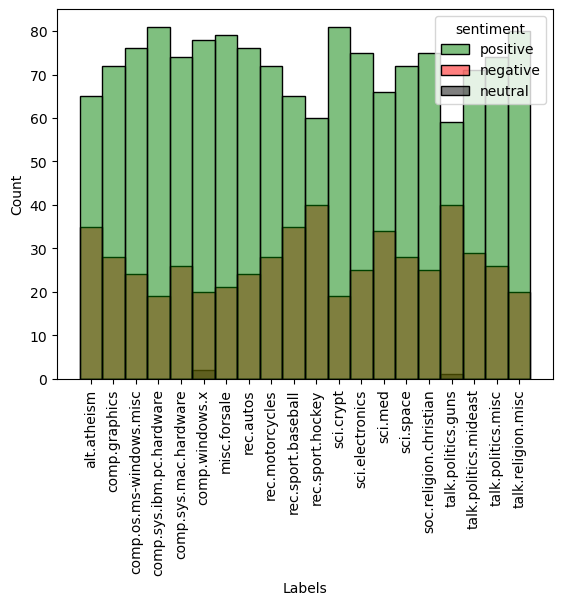

In [47]:
#Let's visualize the above data as stacked histplot
sns.histplot(x=df['Labels'], hue=df['sentiment'], palette={'positive': 'green', 'negative': 'red', 'neutral': 'black'})
plt.xticks(rotation=90)
plt.show()

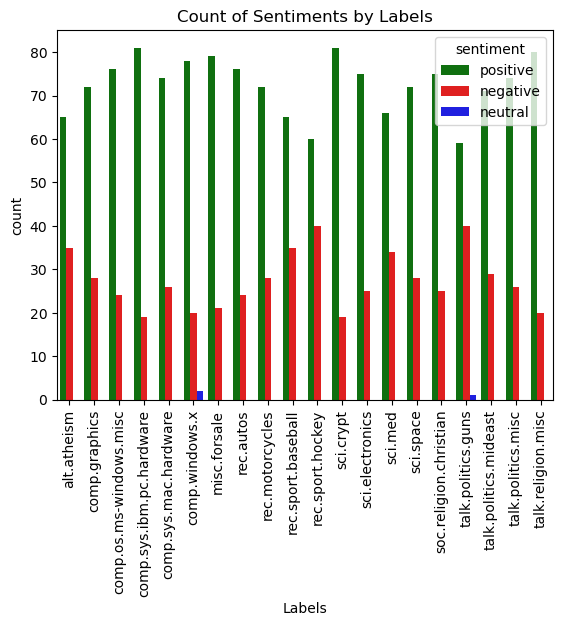

In [48]:
#Let's visualize using countplot for clear distribution
sns.countplot(x=df['Labels'], hue=df['sentiment'], palette={'positive': 'green', 'negative': 'red', 'neutral': 'blue'})
plt.xticks(rotation=90)
plt.title("Count of Sentiments by Labels")
plt.show()


**From above Visualizations and data we infer that :**
* We can notice that in all the categories we have more number of positive sentiment than negative
* We have extrememly less number of neutral blogs

**Neutral**
* Neutral blogs are extremely rare, in total we have only 3.
* We find one neutral blog in 'talk.politics.guns' label and the other 2 are in 'comp.windows.x'.

**Negative**
* The category with most number of negative sentiment is 'rec.sport.hockey' (40) and 'talk.politics.guns' (40) which sounds kind of obvious.
* 'sci.crypt' and 'comp.sys.ibm.pc.hardware' has the least (19) number of negative sentiment blogs.

**Positive**
* 'sci.crypt' (80) and 'comp.sys.ibm.pc.hardware' (80) also has the highest number of positive sentiment blogs.
* 'rec.sport.hockey' (60) and 'talk.politics.guns' (60) also has the lowest number of positive sentiment blogs.

#### 4. Evaluation
#### • Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy of the model is :", accuracy_score(y_pred, y_test))
print("Precision of the model is :", precision_score(y_pred, y_test, average='weighted'))
print("Recall of the model is :", recall_score(y_pred, y_test, average='weighted'))
print("F1 Score of the model is :", f1_score(y_pred, y_test, average='weighted'))

Accuracy of the model is : 0.7583333333333333
Precision of the model is : 0.8308796597108744
Recall of the model is : 0.7583333333333333
F1 Score of the model is : 0.7634544617867365


In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, np.array(y_test)))

              precision    recall  f1-score   support

           0       0.96      0.40      0.57        57
           1       0.86      0.65      0.74        37
           2       0.82      0.90      0.86        30
           3       0.58      0.84      0.69        25
           4       0.67      0.96      0.79        25
           5       0.56      1.00      0.71        20
           6       0.83      0.61      0.70        33
           7       0.81      0.96      0.88        26
           8       0.95      0.64      0.76        33
           9       0.91      0.97      0.94        30
          10       0.96      0.89      0.92        27
          11       1.00      0.49      0.66        49
          12       0.70      0.66      0.68        29
          13       0.70      0.95      0.81        22
          14       0.84      1.00      0.92        27
          15       0.97      0.88      0.92        33
          16       0.69      0.93      0.79        27
          17       0.93    

#### •	Discuss the performance of the model and any challenges encountered during the classification process.

**Preformance**
* On an average the model is performing **okay** with an accuracy score of 75% across all the classes.
* In the classification report we can see that the model performs well on few classes and not so well on the others this may be hapenning because of less number of examples
* A precision score of 83% reveals that our model is able to classify positive labels 83% correctly.
* Recall of 75% measures the actual positive labels identified by the model correctly.

**Challenges**
* **Less Data :** Some of the blogs has less data than other blogs so the model might have prioritized the class with more data than it required.
* **Feature Overlapping :** Blogs across different classes may use different the same words example 'technology' in 'AI' and 'Hardware'.
* **Out of vocabulary words :** Naive Bayes relies on words in the training data, so unseen words in the test data can lead to inaccurate predictions.
* **Unnecessary words :** Some of the words in the blogs were completely gibberish so the model might just ignored it.
* **Sentiment Overlap :** sentiment and category may overlap or conflict.
* **Overfitting to traianing data :** NB assumes feature independence, which is not true leading to overfitting.

#### • Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.

**Summary of Sentiment Analysis Result**

**1. Sentiment Distribution :**
* Positive Sentiment : posts that convey optimism, enthusiasm or positive opinions.
* Negative Sentiments : Posts that express criticism, dissatisfaction or negative emption.
* Neutral Sentiments : Posts which do not portray strong emotional tones

**2. Patterns Observed :**
* Categories like spotrs, travel lean towards positive sentiments
* Categories like politics or current events skew more towards negative or neutral tones
* Categories like technologies have a mix of both types of sentiments.

**Implications for blog content**
* Positive contents are likely to have a broader audience, as theyy attract more number number of readers.
* Negative contents may include areas towards controverst, related to debate etc.
* Neutral sentiment are extremely less in our dataset so hard to draw any conclusion from those.

**Challenges and Insights**
* Sentiment Overlap
* Audience Perception
* Content Strategy

**Practical Applications may include**
* Improved Reader Experience
* Target Content for Specific Audiences
* Tracking Trends over time